In [ ]:
!pip install transformers

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from transformers import AutoTokenizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# make sure you add a shortcut of "295R-Caps-Pattern" folder to your own Drive if you're shared this folder
!ls "/content/drive/My Drive/295R-Caps-Pattern/Data"

raw  subsampled


In [ ]:
# input folders
data = "/content/drive/My Drive/295R-Caps-Pattern/Data"

### BSR data

In [ ]:
# get id column of both datasets
bsr_full = pd.read_csv(f'{data}/raw/asin_bsr_history.csv')

In [ ]:
bsr_full.head(5)

,Unnamed: 0,date,rank,avg180_price,asin
0,0,2017-07-03,9003.666667,17.01,B000139ZHU
1,1,2017-07-04,8211.666667,17.01,B000139ZHU
2,2,2017-07-05,6475.000000,17.01,B000139ZHU
3,3,2017-07-06,10318.000000,17.01,B000139ZHU
4,4,2017-07-07,8335.500000,17.01,B000139ZHU


In [ ]:
# Sorting by date
bsr_sorted = bsr_full.sort_values('date')
bsr_sorted.reset_index(inplace=True)
bsr_sorted.drop(['index', 'Unnamed: 0'], axis=1, inplace=True)

In [ ]:
# Grouping by product and creating timelines
bsr_timelines_by_product = bsr_sorted.groupby('asin')['rank'].apply(list).reset_index(name='rank')
bsr_timelines_by_product['date'] = bsr_sorted.groupby('asin')['date'].apply(list).reset_index(name='date')['date']

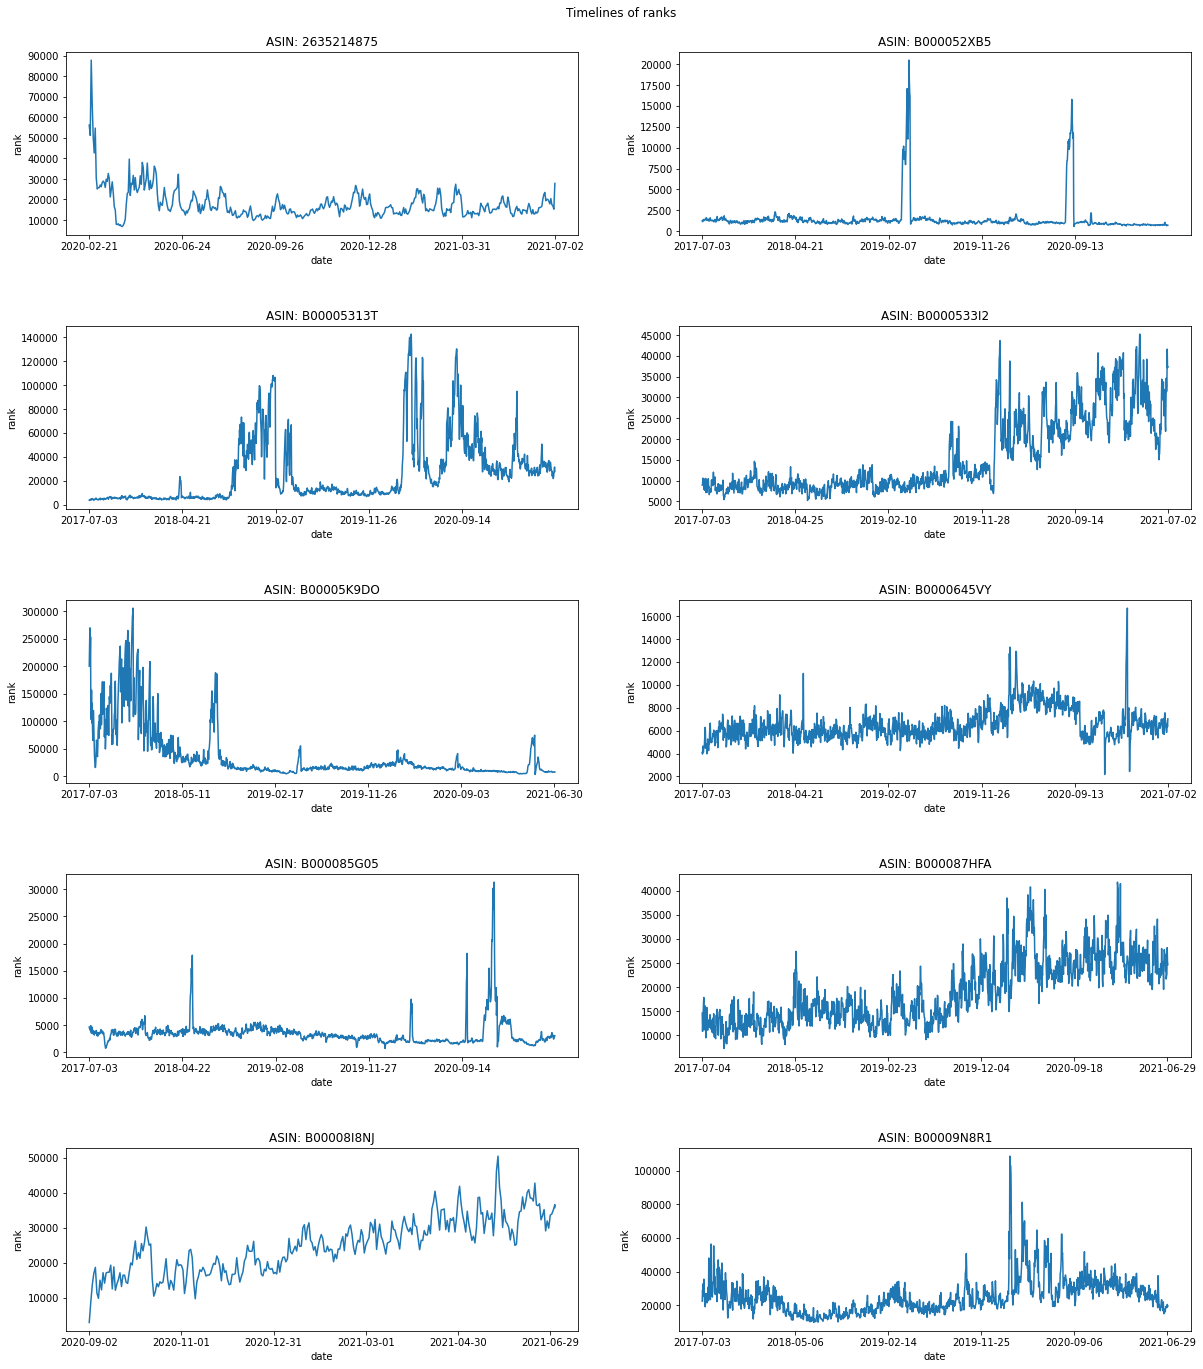

In [ ]:
# Plotting product ranks over time
PLOT_NUMBER = 10
f, axs = plt.subplots(PLOT_NUMBER//2,2,figsize=(18,2*PLOT_NUMBER));
axs = axs.ravel()
f.suptitle('Timelines of ranks')
f.tight_layout(pad=7.0)
for i in range(PLOT_NUMBER):
  axs[i].plot(bsr_timelines_by_product['date'][i],
              bsr_timelines_by_product['rank'][i])
  axs[i].set(title=f"ASIN: {bsr_timelines_by_product['asin'][i]}",
             xlabel='date',
             ylabel='rank')
  axs[i].set_xticks(axs[i].get_xticks()[::len(axs[i].get_xticks())//5])

In [ ]:
# Freeing up RAM for review EDA
del bsr_sorted
del bsr_full
del bsr_timelines_by_product

### review data

In [ ]:
NUMBER_OF_REVIEWS = 10000
review_full = pd.read_csv(f'{data}/clean/asin_review_history_subsampled.csv')[['asin', 'review_text']].head(NUMBER_OF_REVIEWS)

In [ ]:
NUMBER_OF_EXAMPLES = 5
print("Examples of reviews:")
[print(f"{i+1}: {eg_review_text}") for i, eg_review_text in enumerate(list(review_full.head(NUMBER_OF_EXAMPLES)['review_text']))];

Examples of reviews:
1: Horrible product, my mother in law ended up in the hospital with a severe allergic reaction. She had to be in the ICU for a couple of days. Please be careful with this product.
2: Pills are not correct as in the picture shown
3: I bought this for my father , He swears by it that it helps his joints feel better. His neighbor has been using it for a year now and. No more aches & pains also .
4: Muy bueno. Functional super bien
5: This is a good product that gives you energy and makes you feel lighter and you don't get hungry plus you eat healthy.


In [ ]:
reviews = list(map(str, review_full['review_text']))
del review_full

In [ ]:
# pre processing review text for bert-base-cased use
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
tokenized_reviews = tokenizer(reviews, padding=True, truncation=True, return_tensors="tf")

In [ ]:
# decoding the encoded reviews to make sure they match
for ids in tokenized_reviews["input_ids"][:NUMBER_OF_EXAMPLES]:
    print(tokenizer.decode(ids))

[CLS] Horrible product, my mother in law ended up in the hospital with a severe allergic reaction. She had to be in the ICU for a couple of days. Please be careful with this product. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [